## To Extract Features from audio files through MFCC

In [2]:
import os
import librosa
import numpy as np
import opensmile
import pandas as pd
from joblib import Parallel, delayed
import soundfile as sf

# Function to extract MFCC features using librosa with 30-second duration and downsampling
def extract_mfcc(filepath, n_mfcc=10, duration=30, target_sr=16000):
    y, sr = librosa.load(filepath, sr=target_sr, duration=duration) 
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs.T, axis=0) 
    return mfccs_mean

# Function to extract prosodic features (pitch, jitter, shimmer) using OpenSMILE
def extract_prosodic(filepath):
    smile = opensmile.Smile(feature_set=opensmile.FeatureSet.eGeMAPSv02, feature_level=opensmile.FeatureLevel.Functionals)
    prosodic_features = smile.process_file(filepath)
    return prosodic_features.values.flatten()

# Function to combine MFCC and prosodic feature extraction
def extract_all_features(filepath, label):
    mfcc = extract_mfcc(filepath) 
    prosodic = extract_prosodic(filepath)  
    features = np.hstack((mfcc, prosodic))  # Combine features
    return features, label

# Parallel processing for feature extraction
def extract_features_in_parallel(filepaths, labels):
    features_labels = Parallel(n_jobs=-1)(delayed(extract_all_features)(fp, lb) for fp, lb in zip(filepaths, labels))
    features, labels = zip(*features_labels) 
    return np.array(features), np.array(labels)

# Paths to your dementia and no-dementia folders
dementia_folder = 'dementia_audio/'
no_dementia_folder = 'nodementia_audio/'

# Gather file paths and labels
dementia_files = [os.path.join(dementia_folder, f) for f in os.listdir(dementia_folder) if f.endswith('.wav')]
no_dementia_files = [os.path.join(no_dementia_folder, f) for f in os.listdir(no_dementia_folder) if f.endswith('.wav')]
filepaths = dementia_files + no_dementia_files
labels = [1] * len(dementia_files) + [0] * len(no_dementia_files)

# Extract features using parallel processing
X_combined, y = extract_features_in_parallel(filepaths, labels)

# Save the features and labels to a CSV file
df = pd.DataFrame(X_combined)
df['label'] = y  # Add labels as the last column
df.to_csv('audio_features_30sec.csv', index=False)

print(f"Features shape: {X_combined.shape}, Labels shape: {y.shape}")
print("Data saved to 'audio_features_30sec.csv'")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dementia_audio/'

In [26]:
import pandas as pd
df = pd.read_csv('audio_features.csv')
df.head()  

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,label
0,-269.55676,97.304110,35.231457,15.145626,8.773599,-13.427042,-15.567698,3.460103,-13.947879,-2.328819,...,-0.017308,0.232834,3.647887,2.170849,0.378507,0.369135,0.075984,0.078067,-25.747080,1
1,-321.83865,118.948006,-2.943336,15.707595,-2.837963,-11.273924,-24.462158,-19.495058,-9.443311,0.179827,...,-0.010019,0.139222,4.320068,2.365729,0.282252,0.254125,0.132600,0.161800,-26.976809,1
2,-185.40393,73.059880,6.195797,17.442707,5.293228,-7.908930,-9.337265,-7.638465,-9.954939,-4.396464,...,-0.008108,0.385756,4.264280,2.241561,0.341882,0.359305,0.096438,0.134219,-20.985240,1
3,-353.57675,122.947110,12.427642,-6.889062,16.969564,-24.011518,-0.543406,-2.150139,-9.902603,6.706996,...,-0.012652,0.156384,3.955995,2.880659,0.272008,0.263993,0.066165,0.048023,-27.808016,1
4,-414.36800,99.429890,7.864064,35.522820,5.741178,-2.119779,-4.996900,1.847978,0.810031,-5.336146,...,-0.006162,0.115564,4.164394,2.676133,0.226190,0.221231,0.134565,0.195185,-32.289800,1


## Let's look at Distribution of each Features

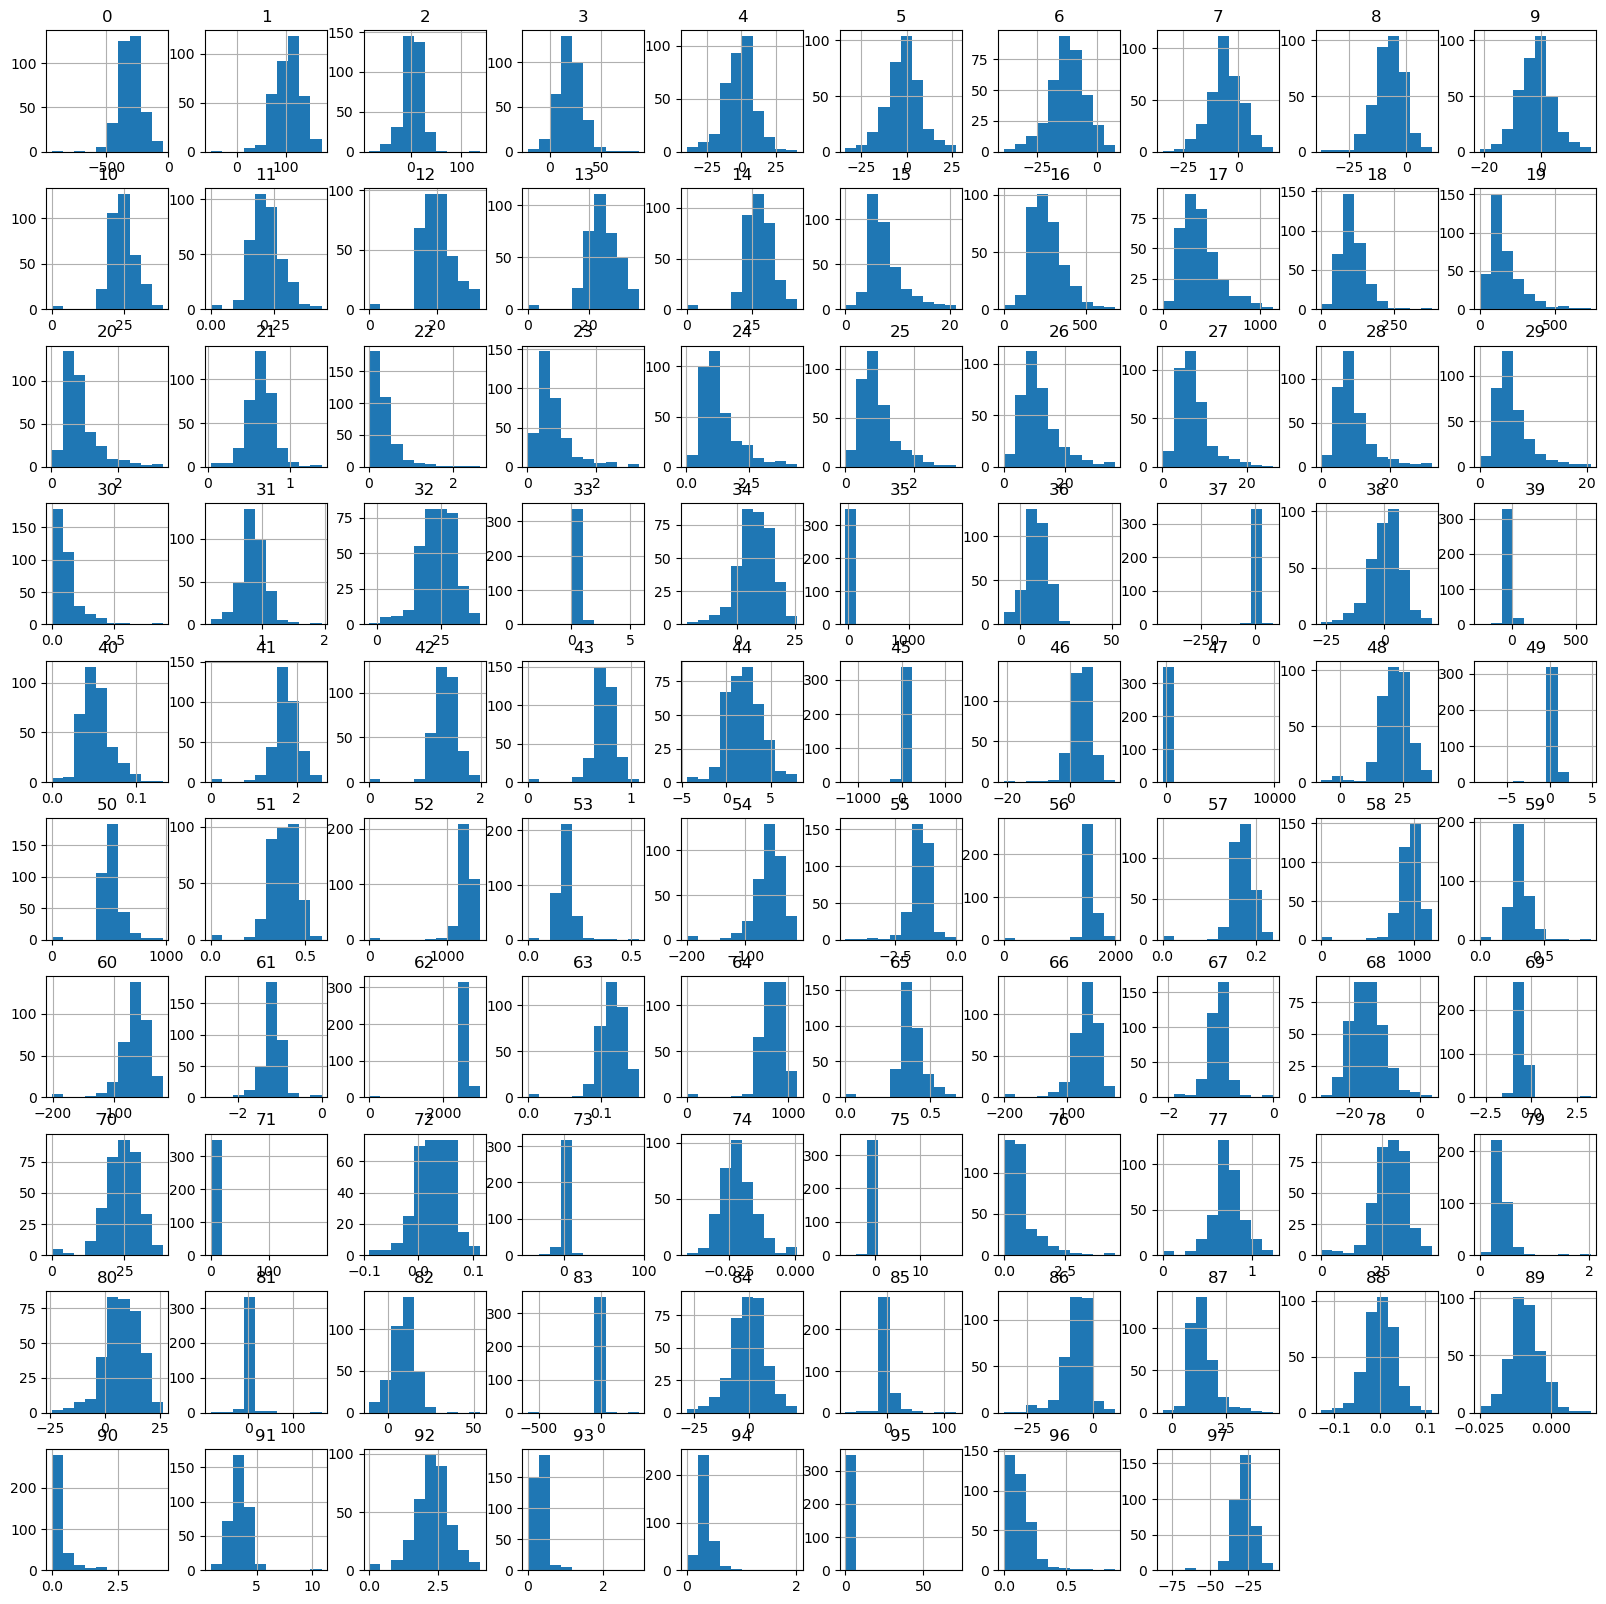

In [27]:
import matplotlib.pyplot as plt
df.iloc[:, :-1].hist(figsize=(20, 20))  # Plot feature histograms\
plt.show()

## Checking for null or missing values

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 99 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       352 non-null    float64
 1   1       352 non-null    float64
 2   2       352 non-null    float64
 3   3       352 non-null    float64
 4   4       352 non-null    float64
 5   5       352 non-null    float64
 6   6       352 non-null    float64
 7   7       352 non-null    float64
 8   8       352 non-null    float64
 9   9       352 non-null    float64
 10  10      352 non-null    float64
 11  11      352 non-null    float64
 12  12      352 non-null    float64
 13  13      352 non-null    float64
 14  14      352 non-null    float64
 15  15      352 non-null    float64
 16  16      352 non-null    float64
 17  17      352 non-null    float64
 18  18      352 non-null    float64
 19  19      352 non-null    float64
 20  20      352 non-null    float64
 21  21      352 non-null    float64
 22  22

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,label
0,-269.55676,97.304110,35.231457,15.145626,8.773599,-13.427042,-15.567698,3.460103,-13.947879,-2.328819,...,-0.017308,0.232834,3.647887,2.170849,0.378507,0.369135,0.075984,0.078067,-25.747080,1
1,-321.83865,118.948006,-2.943336,15.707595,-2.837963,-11.273924,-24.462158,-19.495058,-9.443311,0.179827,...,-0.010019,0.139222,4.320068,2.365729,0.282252,0.254125,0.132600,0.161800,-26.976809,1
2,-185.40393,73.059880,6.195797,17.442707,5.293228,-7.908930,-9.337265,-7.638465,-9.954939,-4.396464,...,-0.008108,0.385756,4.264280,2.241561,0.341882,0.359305,0.096438,0.134219,-20.985240,1
3,-353.57675,122.947110,12.427642,-6.889062,16.969564,-24.011518,-0.543406,-2.150139,-9.902603,6.706996,...,-0.012652,0.156384,3.955995,2.880659,0.272008,0.263993,0.066165,0.048023,-27.808016,1
4,-414.36800,99.429890,7.864064,35.522820,5.741178,-2.119779,-4.996900,1.847978,0.810031,-5.336146,...,-0.006162,0.115564,4.164394,2.676133,0.226190,0.221231,0.134565,0.195185,-32.289800,1


In [30]:
#!pip install missingno

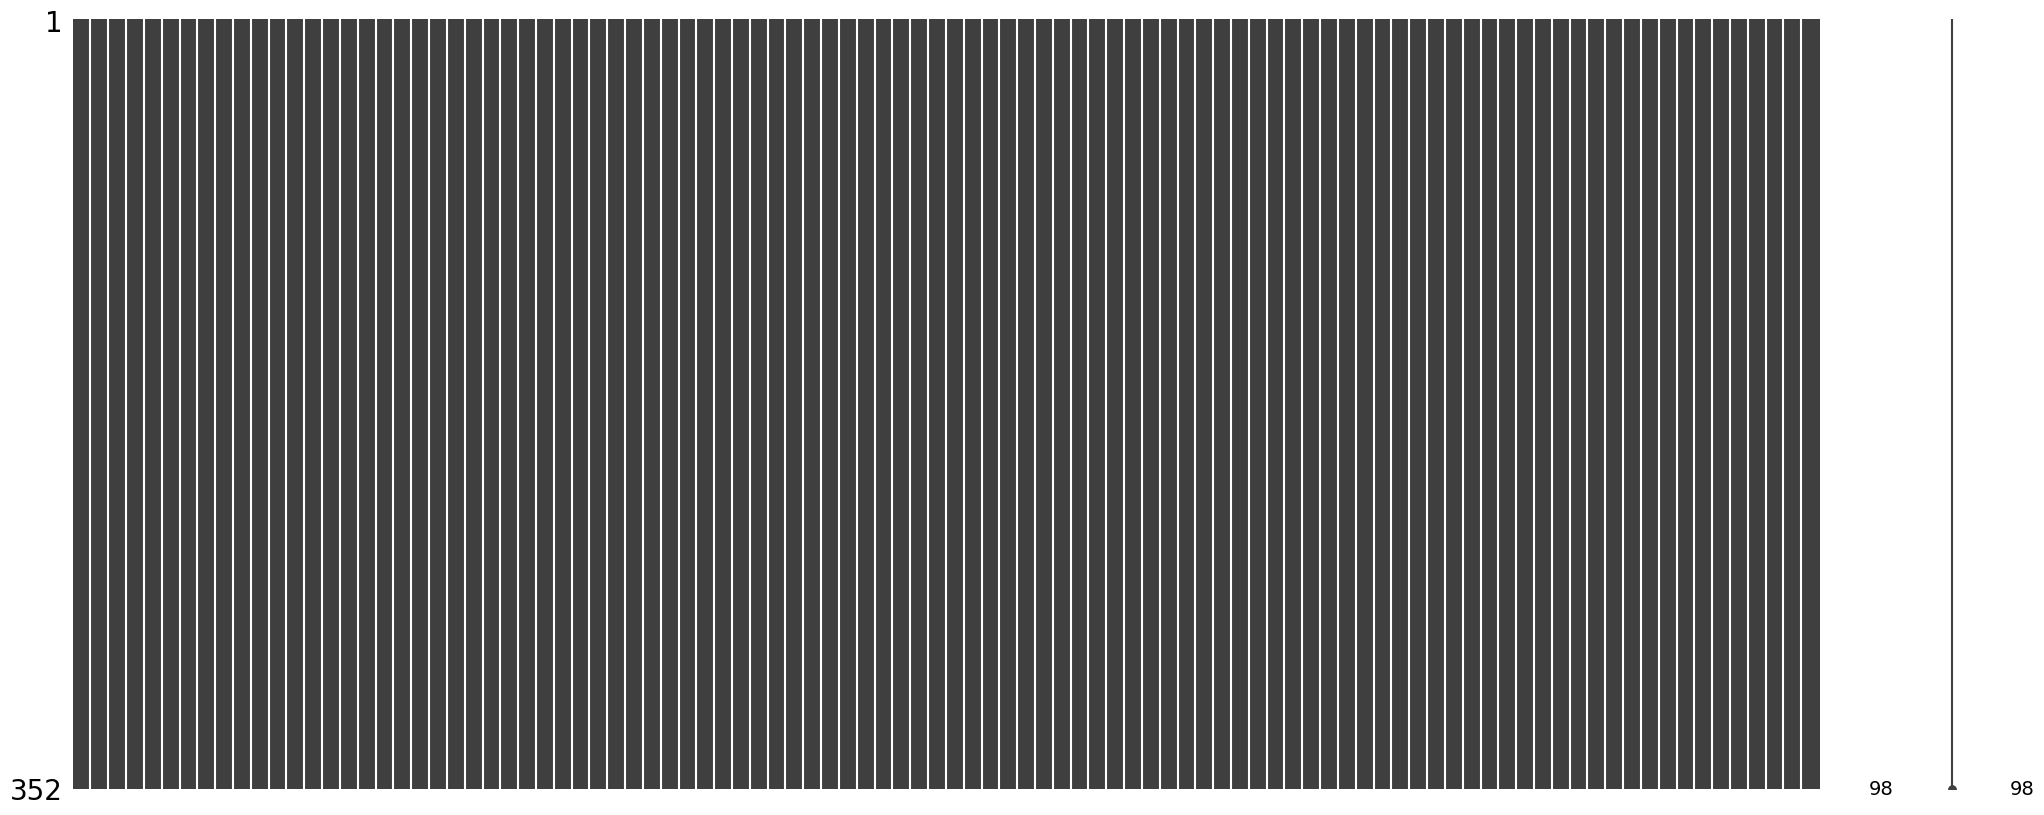

In [31]:
# Checking to see if there are null/Nan/missing values
import missingno as msno
msno.matrix(df.iloc[:,:-1])
plt.show()

In [32]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,label
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,-303.487640,105.609719,3.387151,19.501053,-1.398246,-1.937635,-12.321735,-5.665979,-7.413719,-1.971817,...,-0.008815,0.347763,3.440461,2.290147,0.341733,0.344996,0.626108,0.133480,-27.890015,0.372159
std,94.167664,26.622593,19.819039,12.445741,11.293099,9.526567,7.476769,7.358072,6.258214,5.870715,...,0.005478,0.452423,0.960206,0.622424,0.195555,0.188181,5.089152,0.111907,7.381784,0.484069
min,-939.133000,-52.305060,-81.970100,-21.329388,-39.670773,-33.703762,-38.662216,-34.142902,-37.317833,-21.505420,...,-0.024958,0.002237,0.855651,0.000000,0.000000,0.000000,0.036833,0.000000,-81.560760,0.000000
25%,-352.529360,87.992188,-8.296051,11.737340,-8.248865,-7.481899,-16.762760,-9.920611,-10.933179,-5.849832,...,-0.012228,0.117599,2.900322,1.929470,0.256245,0.253631,0.073951,0.062238,-31.853803,0.000000
50%,-306.904190,107.824355,3.745704,19.309412,-0.683653,-1.729083,-12.032522,-5.729944,-7.368238,-1.895246,...,-0.008957,0.216652,3.433528,2.317729,0.309101,0.304867,0.099630,0.106627,-27.762256,0.000000
75%,-254.776827,123.295016,14.987678,26.435706,5.851284,3.468762,-7.717680,-1.121198,-3.168147,1.395852,...,-0.005433,0.379255,3.908856,2.664682,0.384473,0.384857,0.137970,0.175309,-23.906016,1.000000
max,-44.414246,171.217390,137.329470,86.837490,40.868070,27.140444,7.396332,15.835756,11.247448,17.207283,...,0.014199,4.191974,10.818822,4.003813,2.939231,2.023320,70.900000,0.890544,-8.353885,1.000000


## Data Preprocessing

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# load the feature excluding the label feature
features = df.iloc[: ,:-1]
labels = df["label"]

#standardize the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [34]:
# Create a DataFrame for scaled features with labels
scaled_df = pd.DataFrame(X_scaled, columns=features.columns)
scaled_df['label'] = labels

In [35]:
# Calculate the correlation matrix
scaled_corr_matrix = scaled_df.corr()

# Extract the correlation of all features with the 'label' column
scaled_label_corr = scaled_corr_matrix['label'].sort_values(ascending=False)

# Display the correlation of scaled features with the label
scaled_label_corr

label    1.000000
15       0.187865
29       0.159304
97       0.153343
14       0.143044
           ...   
61      -0.138577
91      -0.148758
5       -0.152006
67      -0.164292
89      -0.182255
Name: label, Length: 99, dtype: float64

In [36]:
scaled_corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,label
0,1.000000,0.017038,-0.344861,0.059652,-0.176417,-0.127367,-0.199003,-0.050299,-0.076907,-0.043191,...,-0.155529,0.630692,0.249585,0.195546,-0.025502,0.017657,-0.076476,-0.293871,0.642646,0.086163
1,0.017038,1.000000,0.054182,-0.035465,0.256819,0.037484,0.118418,0.037514,0.124807,0.181357,...,-0.321294,0.086308,-0.028448,-0.135484,0.157535,0.252429,0.032385,-0.249177,0.039474,0.019815
2,-0.344861,0.054182,1.000000,-0.147487,0.440042,0.255965,0.196992,0.340350,0.222754,0.178418,...,-0.209601,-0.127938,-0.160507,-0.035382,0.017363,0.046307,0.080640,-0.019487,-0.098801,0.017287
3,0.059652,-0.035465,-0.147487,1.000000,-0.049194,0.185176,0.189404,-0.057664,0.205450,-0.074544,...,0.060264,0.104181,0.026578,0.036768,0.034046,0.046241,-0.001403,-0.107303,0.030556,0.044077
4,-0.176417,0.256819,0.440042,-0.049194,1.000000,0.186700,0.204585,0.296145,0.194945,0.146429,...,0.160505,0.010697,-0.130711,-0.033537,0.094757,0.146108,0.062353,-0.027538,-0.027367,-0.047848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.017657,0.252429,0.046307,0.046241,0.146108,0.085839,0.062045,0.087199,0.018420,0.071872,...,-0.085250,0.172033,-0.136388,-0.501302,0.881706,1.000000,-0.187797,-0.187788,0.231825,0.098001
95,-0.076476,0.032385,0.080640,-0.001403,0.062353,-0.013321,0.016989,0.023646,-0.038157,0.067027,...,0.126471,-0.077498,0.369014,-0.374209,-0.178243,-0.187797,1.000000,-0.109026,-0.510128,-0.078203
96,-0.293871,-0.249177,-0.019487,-0.107303,-0.027538,-0.021332,0.020710,-0.113650,-0.052305,-0.061176,...,0.302352,-0.224308,-0.340119,-0.198905,-0.124379,-0.187788,-0.109026,1.000000,-0.115479,-0.049219
97,0.642646,0.039474,-0.098801,0.030556,-0.027367,-0.014706,-0.023397,0.007722,0.034580,-0.001235,...,-0.212769,0.597018,-0.095748,0.232584,0.141292,0.231825,-0.510128,-0.115479,1.000000,0.153343


In [37]:
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [38]:
# lets split the data into train and test splits 

X_train , X_test , y_train , y_test = train_test_split(X_scaled , labels, test_size = 0.2 , random_state = 42)

print(f"Training data Shape: {X_train.shape}, Testing data shape : {X_test.shape}")

Training data Shape: (281, 98), Testing data shape : (71, 98)


In [39]:
y_train.shape, y_test.shape

((281,), (71,))

## Model 2 : Logistic Regression:

In [40]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None,max_iter = 500)
model.fit(X_train , y_train)
model.score(X_train , y_train)

0.8505338078291815

In [41]:
# to predict 
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
y_preds = model.predict(X_test)


accuracy = accuracy_score(y_test , y_preds)
confusion_matrix = confusion_matrix(y_test ,y_preds)
classification_report = classification_report(y_test , y_preds)

# print the result 

print(f"Test accuracy : {accuracy * 100:.2f}%")
print(f"confusion_matrix:\n ",confusion_matrix)
print(f"classification_report :\n ",classification_report)

Test accuracy : 66.20%
confusion_matrix:
  [[29  9]
 [15 18]]
classification_report :
                precision    recall  f1-score   support

           0       0.66      0.76      0.71        38
           1       0.67      0.55      0.60        33

    accuracy                           0.66        71
   macro avg       0.66      0.65      0.65        71
weighted avg       0.66      0.66      0.66        71



In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

# Evaluate on test set
best_log_reg = grid_search.best_estimator_
test_accuracy = best_log_reg.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Best Parameters: {'C': 0.001}
Best Cross-Validation Accuracy: 0.65
Test Accuracy: 66.20%


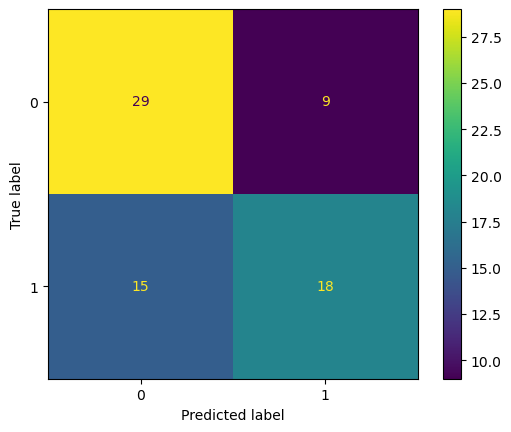

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix).plot()
plt.show()